# Confidence intervals

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

### Generate normal data

In [2]:
# Generate some sample data (normally distributed)
np.random.seed(42)  # for reproducibility
sample_size = 1200
mu = 50
sigma = 10
data = np.random.normal(loc=mu, scale=sigma, size=sample_size)  # mu is 50, sigma is 10

In [3]:
data

array([54.96714153, 48.61735699, 56.47688538, ..., 55.52489954,
       52.23914134, 63.6414043 ])

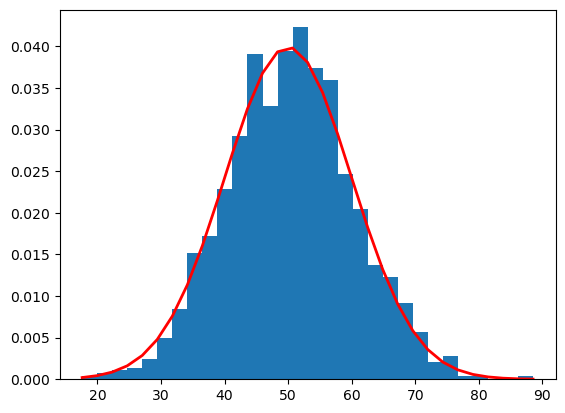

In [4]:
import matplotlib.pyplot as plt

# histogram of our data (in blue)
count, bins, ignored = plt.hist(data, 30, density=True)

# actual plot of distribution (in red)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

## Confidence interval for mu

In [5]:
s1 = np.std(data, ddof=1) / np.sqrt(sample_size)
s2 = np.std(data, ddof=0) / np.sqrt(sample_size)
s3 = stats.sem(data)
print(s1)
print(s2)
print(s3)

0.2853251621642691
0.28520625190189947
0.2853251621642691


### Assuming we know sigma=10

In [6]:
sample_mean = np.mean(data)

lower, higher = stats.norm.interval(confidence=0.95, loc=sample_mean, scale=sigma / np.sqrt(sample_size))
# Note that scale here is the standard error (using the actual sigma)

print(lower, higher)

49.81802929147285 50.949615025549015


### Calculate by hand

[$\bar{x} - \frac{\sigma}{\sqrt{n}} z_{1-\frac{\alpha}{2}}$, $\bar{x} + \frac{\sigma}{\sqrt{n}} z_{1-\frac{\alpha}{2}}$]

In [7]:
import scipy
sample_mean = np.mean(data)
confidence_level = 0.95
z_critical_value = scipy.stats.norm.ppf(1-(1-confidence_level) / 2) 
margin_of_error = z_critical_value * (sigma / np.sqrt(sample_size))
lower, higher = sample_mean - margin_of_error, sample_mean + margin_of_error
print(lower, higher)

49.81802929147285 50.949615025549015


### Assuming we do not know sigma

In [8]:
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

lower, higher = stats.t.interval(confidence=0.95, loc=sample_mean, df = sample_size - 1,
                                 scale = sample_std / np.sqrt(sample_size))

print(lower, higher)

49.82403002850487 50.94361428851699


# Suppose we do not know whether the samples are drawn from Normal distribution

If we have enough data, we can split it into batches of 30 or more

On each batch calculate the mean

Using those means as our samples

## Central Limit Theorem (CLT)

The CLT states that the distribution of the sample mean will be approximately normal if the sample size is large enough, regardless of the underlying distribution of the data. This allows us to use normal distribution-based methods to calculate confidence intervals for the mean when the sample size is large.

## Direct Use of CLT (Z Distribution)

When we have a large sample size, we can directly apply the CLT and use the Z distribution to calculate confidence intervals for the mean.

### Pros
- **Simplicity**: It is straightforward and requires less computational effort.
- **Effectiveness**: Works well for large, reasonably normal distributions.

### Cons
- **Sensitivity**: Less robust to outliers and non-normality.
- **Sample Size**: May require larger sample sizes for accurate normal approximation.

## The Batching Method

To handle non-normally distributed data, we can divide the data into batches of size 30, calculate the mean for each batch, and then use these means to calculate the confidence interval. This method leverages the CLT in a more controlled manner.

### Why Use the Batching Method?

1. **Ensures Normality of Means**: Even if the original data is not normally distributed, the mean of each batch will be approximately normally distributed due to the CLT. This reduces potential issues with skewness or heavy tails in the original data.

2. **Reduces Bias and Variance**: This method can help mitigate the effects of outliers or non-normality in the original data by averaging out the extreme values within each batch.

3. **More Reliable Estimates**: The batch means are more reliably normal, and the standard error of these means can be more representative of the true population mean's standard error.

### Pros
- **Robustness**: Provides additional robustness to non-normality and outliers.
- **Accuracy**: Ensures means are normally distributed even for highly non-normal data.
- **Reliability**: Can provide more reliable confidence intervals in practice.

### Cons
- **Computational Effort**: More computationally intensive.
- **Sample Size**: Reduces the effective sample size (from \(N\) to \(N/30\)).
- **Handling**: Requires careful handling to ensure batches are of equal size.

## Conclusion

While the CLT theoretically allows us to ignore the distribution of the data with a sufficiently large sample, practical applications benefit from the robustness provided by the batching method. This is especially true for data with significant deviations from normality, outliers, or when the sample size, while large, is not enormous. The batching method helps to ensure the assumptions underlying the use of the normal distribution in confidence interval calculations are better met, leading to more reliable and accurate results.

In summary, the batching method is an extra step to ensure robustness and accuracy, particularly useful in practical scenarios where data deviations might otherwise impact the reliability of the results.


In [9]:
# Generate a large dataset (normally distributed)
np.random.seed(42)  # for reproducibility
data_size = sample_size
data = np.random.normal(loc=50, scale=10, size=data_size)

# Define the batch size
batch_size = 30
num_batches = data_size // batch_size

# Split data into batches
batches = np.array_split(data, num_batches)

# Calculate means for each batch
batch_means = np.array([np.mean(batch) for batch in batches])

overall_mean = np.mean(batch_means)
overall_std = np.std(batch_means, ddof=1)

lower, higher = stats.t.interval(confidence=0.95, loc=overall_mean, df=len(batch_means) - 1,
                                 scale = overall_std / np.sqrt(len(batch_means)))

print(lower, higher)

49.7888495986529 50.97879471836896
